# Köppen-Geiger climate shift draft

In [1]:
import io, requests

import numpy as np
import pandas as pd
import geopandas as gpd

import rasterio as rst
from rasterio.plot import show,show_hist
from rasterio.mask import mask

import matplotlib as mpl
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
def getdf(link):
  req = requests.get(link).content
  return gpd.read_file(io.StringIO(req.decode('utf-8')))

In [3]:
terr_ecoregions = "https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/TerrestrialEcoregionsoftheWorld_WWF.geojson"
terr_ecoregions_df = getdf(terr_ecoregions)

In [4]:
ykn_int = terr_ecoregions_df[terr_ecoregions_df['ECO_NAME']=='Yukon Interior dry forests']
ykn_int

,OBJECTID_1,OBJECTID,AREA,ECO_NAME,REALM,BIOME,ECO_NUM,ECO_ID,ECO_SYM,GBL_STAT,...,G200_BIOME,G200_STAT,area_km2,eco_code,BIOME_1,GBL_STAT_1,REALM_1,Shape_Length,Shape_Area,geometry
5950,5951,5252,62742.225977,Yukon Interior dry forests,NA,6,17,50617,65,2,...,0,0,62742,NA0617,,,Nearctic,39.383198,10.516696,"POLYGON ((-135.07761 62.66053, -135.18541 62.7..."


# Climate shift

In [18]:
shift_25 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/1901-1925.geojson"
shift_25_df = getdf(shift_25)
shift_50 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/1926-1950.geojson"
shift_50_df = getdf(shift_50)
shift_75 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/1951-1975.geojson"
shift_75_df = getdf(shift_75)
shift_00 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/1976-2000.geojson"
shift_00_df = getdf(shift_00)

shift_A125 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2001-2025-A1FI.geojson"
shift_A125_df = getdf(shift_A125)
shift_A150 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2026-2050-A1FI.geojson"
shift_A150_df = getdf(shift_A150)
shift_A175 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2051-2075-A1FI.geojson"
shift_A175_df = getdf(shift_A175)
shift_A100 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2076-2100-A1FI.geojson"
shift_A100_df = getdf(shift_A100)

shift_A225 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2001-2025-A2.geojson"
shift_A225_df = getdf(shift_A225)
shift_A250 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2026-2050-A2.geojson"
shift_A250_df = getdf(shift_A250)
shift_A275 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2051-2075-A2.geojson"
shift_A275_df = getdf(shift_A275)
shift_A200 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2076-2100-A2.geojson"
shift_A200_df = getdf(shift_A200)

shift_B125 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2001-2025-B1.geojson"
shift_B125_df = getdf(shift_B125)
shift_B150 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2026-2050-B1.geojson"
shift_B150_df = getdf(shift_B150)
shift_B175 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2051-2075-B1.geojson"
shift_B175_df = getdf(shift_B175)
shift_B100 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2076-2100-B1.geojson"
shift_B100_df = getdf(shift_B100)

shift_B225 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2001-2025-B2.geojson"
shift_B225_df = getdf(shift_B225)
shift_B250 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2026-2050-B2.geojson"
shift_B250_df = getdf(shift_B250)
shift_B275 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2051-2075-B2.geojson"
shift_B275_df = getdf(shift_B275)
shift_B200 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2076-2100-B2.geojson"
shift_B200_df = getdf(shift_B200)

In [19]:
shift_25_df.shape

(2319, 6)

In [20]:
shift_25_df.head()

,OBJECTID,ID,GRIDCODE,Shape_Length,Shape_Area,geometry
0,1,1,62,2.0,0.25,"POLYGON ((-37.50000 83.50000, -37.50000 84.000..."
1,2,2,62,16.0,3.75,"POLYGON ((-29.50000 83.50000, -29.50000 84.000..."
2,3,3,62,5.0,1.00,"POLYGON ((-46.00000 83.00000, -44.00000 83.000..."
3,4,4,62,7.0,1.50,"POLYGON ((-42.50000 83.50000, -42.50000 83.000..."
4,5,5,62,3.0,0.50,"POLYGON ((-75.50000 81.00000, -75.50000 81.500..."


In [60]:
ykn_int_koppen_25_df = shift_25_df.clip(ykn_int)
ykn_int_koppen_50_df = shift_50_df.clip(ykn_int)
ykn_int_koppen_75_df = shift_75_df.clip(ykn_int)
ykn_int_koppen_00_df = shift_00_df.clip(ykn_int)

ykn_int_A125_df = shift_A125_df.clip(ykn_int)
ykn_int_A150_df = shift_A150_df.clip(ykn_int)
ykn_int_A175_df = shift_A175_df.clip(ykn_int)
ykn_int_A100_df = shift_A100_df.clip(ykn_int)

ykn_int_A225_df = shift_A225_df.clip(ykn_int)
ykn_int_A250_df = shift_A250_df.clip(ykn_int)
ykn_int_A275_df = shift_A275_df.clip(ykn_int)
ykn_int_A200_df = shift_A200_df.clip(ykn_int)

ykn_int_B125_df = shift_B125_df.clip(ykn_int)
ykn_int_B150_df = shift_B150_df.clip(ykn_int)
ykn_int_B175_df = shift_B175_df.clip(ykn_int)
ykn_int_B100_df = shift_B100_df.clip(ykn_int)

ykn_int_B225_df = shift_B225_df.clip(ykn_int)
ykn_int_B250_df = shift_B250_df.clip(ykn_int)
ykn_int_B275_df = shift_B275_df.clip(ykn_int)
ykn_int_B200_df = shift_B200_df.clip(ykn_int)

In [62]:
koppen = {'11': 'Tropical rainforest climate', '12': 'Tropical monsoon climate', 
              '13': 'Tropical savanna climate with dry-summer characteristics', 
              '14': 'Tropical savanna climate with dry-winter characteristics', 
              '21': 'Cold desert climate', '22': 'Hot desert climate', '26': 'Cold semi-arid climate',
              '26.0': 'Cold semi-arid climate',
              '27': 'Hot semi-arid climate ', '31': 'Humid subtropical climate', 
              '32': 'Temperate oceanic climate', '33': 'Subpolar oceanic climate ', 
              '34': 'Hot-summer Mediterranean climate ', '35': 'Warm-summer Mediterranean climate ',
              '36': 'Cold-summer Mediterranean climate ', 
              '37': 'Monsoon-influenced humid subtropical climate ', 
              '38': 'Subtropical highland climate ', '39': 'Cold subtropical highland climate ', 
              '41': 'Hot-summer humid continental climate ', 
              '42': 'Warm-summer humid continental climate ', '43': 'Subarctic climate ',
              '43.0': 'Subarctic climate ',
              '44': 'Extremely cold subarctic climate ', 
              '45': 'Mediterranean-influenced hot-summer humid continental climate ', 
              '46': 'Mediterranean-influenced warm-summer humid continental climate ', 
              '47': 'Mediterranean-influenced subarctic climate', 
              '47.0': 'Mediterranean-influenced subarctic climate',
              '48': 'Mediterranean-influenced extremely cold subarctic climate ', 
              '49': 'Monsoon-influenced hot-summer humid continental climate ', 
              '50': 'Monsoon-influenced warm-summer humid continental climate ', 
              '51': 'Monsoon-influenced subarctic climate ', 
              '51.0': 'Monsoon-influenced subarctic climate ',
              '52': 'Monsoon-influenced extremely cold subarctic climate ', 
              '61': 'Ice cap climate ', '62': 'Tundra climate ', 
              '62.0': 'Tundra climate ',
              '0': 'NaN'}

ykn_int_koppen_25_df['GRIDCODE']=shift_25_df['GRIDCODE'].astype('str').replace(koppen)
ykn_int_koppen_50_df['GRIDCODE']=shift_50_df['GRIDCODE'].astype('str').replace(koppen)
ykn_int_koppen_75_df['GRIDCODE']=shift_75_df['GRIDCODE'].astype('str').replace(koppen)
ykn_int_koppen_00_df['GRIDCODE']=shift_00_df['GRIDCODE'].astype('str').replace(koppen)

ykn_int_A125_df['GRIDCODE'] = shift_A125_df['GRIDCODE'].astype('str').replace(koppen)
ykn_int_A150_df['GRIDCODE'] = shift_A150_df['GRIDCODE'].astype('str').replace(koppen)
ykn_int_A175_df['GRIDCODE'] = shift_A175_df['GRIDCODE'].astype('str').replace(koppen)
ykn_int_A100_df['GRIDCODE'] = shift_A100_df['GRIDCODE'].astype('str').replace(koppen)

ykn_int_A225_df['GRIDCODE'] = shift_A225_df['GRIDCODE'].astype('str').replace(koppen)
ykn_int_A250_df['GRIDCODE'] = shift_A250_df['GRIDCODE'].astype('str').replace(koppen)
ykn_int_A275_df['GRIDCODE'] = shift_A275_df['GRIDCODE'].astype('str').replace(koppen)
ykn_int_A200_df['GRIDCODE'] = shift_A200_df['GRIDCODE'].astype('str').replace(koppen)

ykn_int_B125_df['GRIDCODE'] = shift_B125_df['GRIDCODE'].astype('str').replace(koppen)
ykn_int_B150_df['GRIDCODE'] = shift_B150_df['GRIDCODE'].astype('str').replace(koppen)
ykn_int_B175_df['GRIDCODE'] = shift_B175_df['GRIDCODE'].astype('str').replace(koppen)
ykn_int_B100_df['GRIDCODE'] = shift_B100_df['GRIDCODE'].astype('str').replace(koppen)

ykn_int_B225_df['GRIDCODE'] = shift_B225_df['GRIDCODE'].astype('str').replace(koppen)
ykn_int_B250_df['GRIDCODE'] = shift_B250_df['GRIDCODE'].astype('str').replace(koppen)
ykn_int_B275_df['GRIDCODE'] = shift_B275_df['GRIDCODE'].astype('str').replace(koppen)
ykn_int_B200_df['GRIDCODE'] = shift_B200_df['GRIDCODE'].astype('str').replace(koppen)

# Observed data

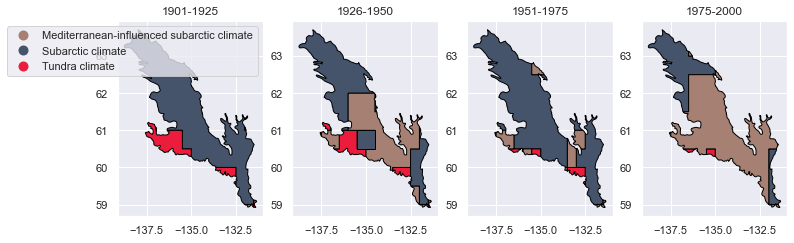

In [24]:
cmap=colors.LinearSegmentedColormap.from_list("",["#A68072","#44546A","#EC1C3C"])
fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(12,10))
ax1.set_title('1901-1925')
ax2.set_title('1926-1950')
ax3.set_title('1951-1975')
ax4.set_title('1975-2000')

ykn_int_koppen_25_df.plot(ax=ax1,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
ykn_int_koppen_50_df.plot(ax=ax2,column='GRIDCODE',cmap=cmap,edgecolor='black')
ykn_int_koppen_75_df.plot(ax=ax3,column='GRIDCODE',cmap=cmap,edgecolor='black')
ykn_int_koppen_00_df.plot(ax=ax4,column='GRIDCODE',cmap=cmap,edgecolor='black')
plt.show()

# Projection/Scenario analysis

#### A1

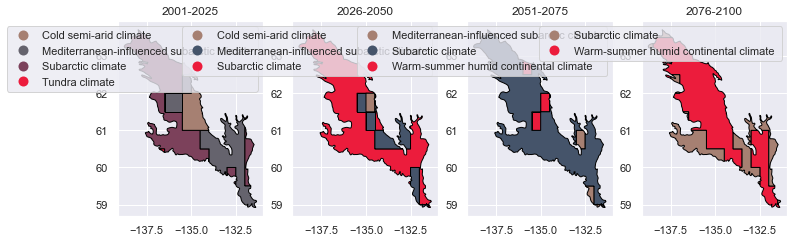

In [71]:
cmap=colors.LinearSegmentedColormap.from_list("",["#A68072","#44546A","#EC1C3C"])
fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(12,10))
ax1.set_title('2001-2025')
ax2.set_title('2026-2050')
ax3.set_title('2051-2075')
ax4.set_title('2076-2100')

ykn_int_A125_df.plot(ax=ax1,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
ykn_int_A150_df.plot(ax=ax2,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
ykn_int_A175_df.plot(ax=ax3,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
ykn_int_A100_df.plot(ax=ax4,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
plt.show()

#### A2

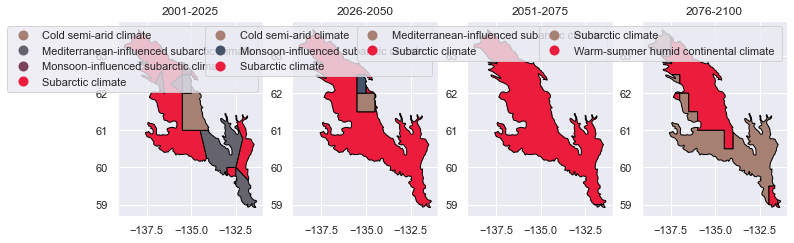

In [58]:
cmap=colors.LinearSegmentedColormap.from_list("",["#A68072","#44546A","#EC1C3C"])
fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(12,10))
ax1.set_title('2001-2025')
ax2.set_title('2026-2050')
ax3.set_title('2051-2075')
ax4.set_title('2076-2100')

ykn_int_A225_df.plot(ax=ax1,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
ykn_int_A250_df.plot(ax=ax2,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
ykn_int_A275_df.plot(ax=ax3,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
ykn_int_A200_df.plot(ax=ax4,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
plt.show()

#### B1

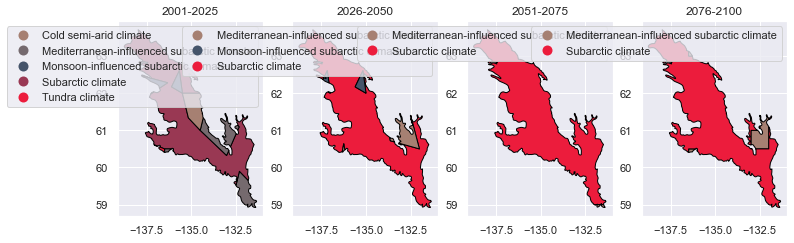

In [59]:
cmap=colors.LinearSegmentedColormap.from_list("",["#A68072","#44546A","#EC1C3C"])
fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(12,10))
ax1.set_title('2001-2025')
ax2.set_title('2026-2050')
ax3.set_title('2051-2075')
ax4.set_title('2076-2100')

ykn_int_B125_df.plot(ax=ax1,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
ykn_int_B150_df.plot(ax=ax2,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
ykn_int_B175_df.plot(ax=ax3,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
ykn_int_B100_df.plot(ax=ax4,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
plt.show()

#### B2

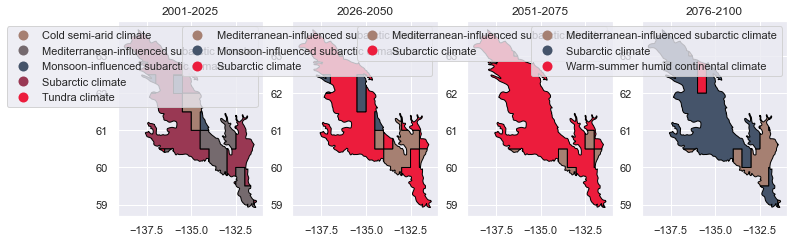

In [28]:
cmap=colors.LinearSegmentedColormap.from_list("",["#A68072","#44546A","#EC1C3C"])
fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(12,10))
ax1.set_title('2001-2025')
ax2.set_title('2026-2050')
ax3.set_title('2051-2075')
ax4.set_title('2076-2100')

ykn_int_B225_df.plot(ax=ax1,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
ykn_int_B250_df.plot(ax=ax2,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
ykn_int_B275_df.plot(ax=ax3,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
ykn_int_B200_df.plot(ax=ax4,column='GRIDCODE',cmap=cmap,edgecolor='black',legend=True)
plt.show()